# Tugas 1 Multiple Linear Regression

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

### Variabel Bebas (Fitur)

1. Age (Usia)
2. Sex (Jenis Kelamin)
3. BMI (Body Mass Index)
4. Children (Jumlah Anak)
5. Smoker (Perokok)
6. Region (Wilayah)

### Variabel Target

1. Charges (Biaya Medis Personal)


### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

c:\Users\SUG\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


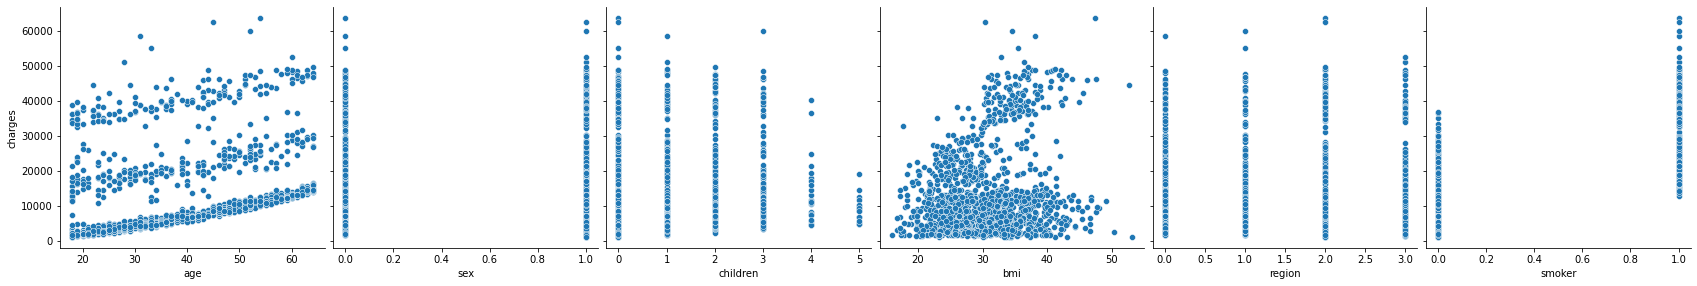

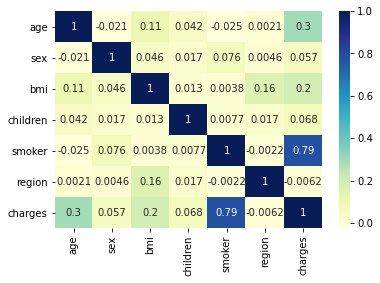

In [49]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# baca data dari file CSV
data = pd.read_csv('insurance.csv')

le = LabelEncoder() # membuat objek dari LabelEncoder
data['sex'] = le.fit_transform(data['sex']) # proses encoding
data['region'] = le.fit_transform(data['region']) # proses encoding
data['smoker'] = le.fit_transform(data['smoker']) # proses encoding
data.head()

# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'children', 'bmi', 'region', 'smoker'],
y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data[['age','smoker']]
y = data['charges']

# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 3. Lakukan feature scaling jika diperlukan.

### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [50]:
# Inisialisasi model Linear Regression
model = LinearRegression()

### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [51]:
# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X)

### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [52]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
#y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 4196.711823280103
MSE: 40868155.23680598
RMSE: 6392.820601018457
R-squared: 0.7211178946959123
